<a href="https://colab.research.google.com/github/nagmafarez/IC-Assignments/blob/main/IDS_RNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing important libraries
import kagglehub


In [ ]:
#Datset link : https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
# Downloading the dataset
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
print("Path to the dataset files :", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to the dataset files : /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [ ]:
# Extracting the data
import pandas as pd
df = pd.read_csv(path + "/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Getting the proportions of values
df['sentiment'].value_counts(normalize = True)

,proportion
sentiment,
positive,0.5
negative,0.5


In [ ]:
# you cannot feed imbalance data to RNNs, like 30:70, 40:60. the above data is oerfectly balanced

In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re, string, time
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, SimpleRNN, GRU
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# re means regular expression

In [ ]:
# Cleaning
def clean_text(text):
  text = text.lower()
  text = re.sub(r"<.*>", " ", text)
  text = text.translate(str.maketrans("", "", string.punctuation))
  text = re.sub(r"\d+", "", text)
  text = re.sub(r"\s+", " ", text).strip()
  return text

In [ ]:
#Strip function is removing the empty blank spaces / excess white space

In [ ]:
# Applying the function
df['clean_review'] = df['review'].apply(clean_text)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df.head()

,review,sentiment,clean_review,label
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the realism real...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,1


In [ ]:
# Fine tune vocab and Maxlen
# you can try ->
# vocab_size = 5000, 10000,20000
# maxlen = 100, 200, 300

vocab_size = 15000
maxlen = 250

tokenizer = Tokenizer(num_words = vocab_size, oov_token = '')
tokenizer.fit_on_texts(df['clean_review'])

In [ ]:
# number of unique words of all the reviews
# maxlen = lenth of each review

In [ ]:
# Creating input features and target variable
X = tokenizer.texts_to_sequences(df['clean_review'])
X = pad_sequences(X, maxlen=maxlen, padding = 'post', truncating = 'post')
y = df['label'].values

In [ ]:
# Performing Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Model builders
embedding_dim = 128
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

In [ ]:
# defining the finction for SimpleRNN
def build_rnn(units_list = [64], dropout = 0.3):
  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dim, input_length = maxlen))
  for i, units in enumerate(units_list):
    model.add(SimpleRNN(units, activation = 'relu', return_sequences = (i < len(units_list) - 1)))
    model.add(Dropout(dropout))
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
# defining the finction for LSTM
def build_lstm(units_list = [64], dropout = 0.3):
  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dim, input_length = maxlen))
  for i, units in enumerate(units_list):
    model.add(LSTM(units, activation = 'relu', return_sequences = (i < len(units_list) - 1)))
    model.add(Dropout(dropout))
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
# defining the finction for GRU
def build_gru(units_list = [64], dropout = 0.3):
  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dim, input_length = maxlen))
  for i, units in enumerate(units_list):
    model.add(GRU(units, activation = 'relu', return_sequences = (i < len(units_list) - 1)))
    model.add(Dropout(dropout))
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
# Variants of the model
configs = [
    #RNN variants
    ("RNN-32", build_rnn([32], 0.2)),
    ("RNN-64-32", build_rnn([64, 32], 0.3)),
    ("RNN-128-64-32", build_rnn([128, 64, 32], 0.5)),

    #LSTM variants
    ("LSTM-32", build_lstm([32], 0.2)),
    ("LSTM-64-32", build_lstm([64, 32], 0.3)),
    ("LSTM-128-64-32", build_lstm([128, 64, 32], 0.5)),

    #GRU variants
    ("GRU-32", build_gru([32], 0.2)),
    ("GRU-64-32", build_gru([64, 32], 0.3)),
    ("GRU-128-64-32", build_gru([128, 64, 32], 0.5)),
]

In [ ]:
# Training the model
history = {}
results = {}
timings = {}

for name, model in configs:
  print(f"\n======== Training {name} ========")
  start_time = time.time()
  h = model.fit(
      X_train, y_train,
      validation_split = 0.2,
      epochs = 10, batch_size = 64,
      callbacks = (early_stop),
      verbose = 1
  )
  end = time.time()
  elapsed = end - start_time

  loss, acc = model.evaluate(X_test, y_test)
  print(f"{name} Test Accuracy : {acc * 100:.2f}% Training Time : {elapsed:.2f} sec")

  history[name] = h
  results[name] = (loss, acc)
  timings[name] = elapsed


======== Training RNN-32 ========
Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 64s 128ms/step - accuracy: 0.5248 - loss: 0.6785 - val_accuracy: 0.4961 - val_loss: 0.7018
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 68s 101ms/step - accuracy: 0.5307 - loss: 0.6583 - val_accuracy: 0.4938 - val_loss: 0.7213
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 54s 107ms/step - accuracy: 0.5425 - loss: 0.6405 - val_accuracy: 0.5033 - val_loss: 0.7550
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 45s 91ms/step - accuracy: 0.5453 - loss: 0.6360 - val_accuracy: 0.5011 - val_loss: 0.7678
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5045 - loss: 0.6977
RNN-32 Test Accuracy : 50.50% Training Time : 232.14 sec

======== Training RNN-64-32 ========
Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 91s 176ms/step - accuracy: 0.4973 - loss: 0.6937 - val_accuracy: 0.4980 - val_loss: 0.6932
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 157s 207ms/step - accuracy: 0.5076 - loss: 0.6904 - val_accuracy: 0.5030 - val_loss: 0.6944
Epoch 3/

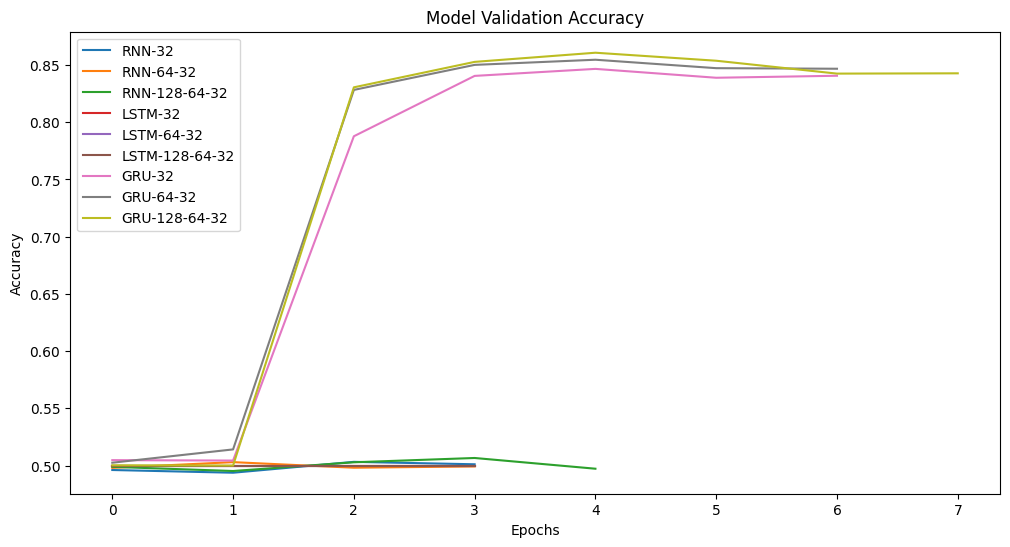

In [ ]:
#Plots
plt.figure(figsize = (12,6))
for name, h in history.items():
  plt.plot(h.history['val_accuracy'], label = name)

plt.title('Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

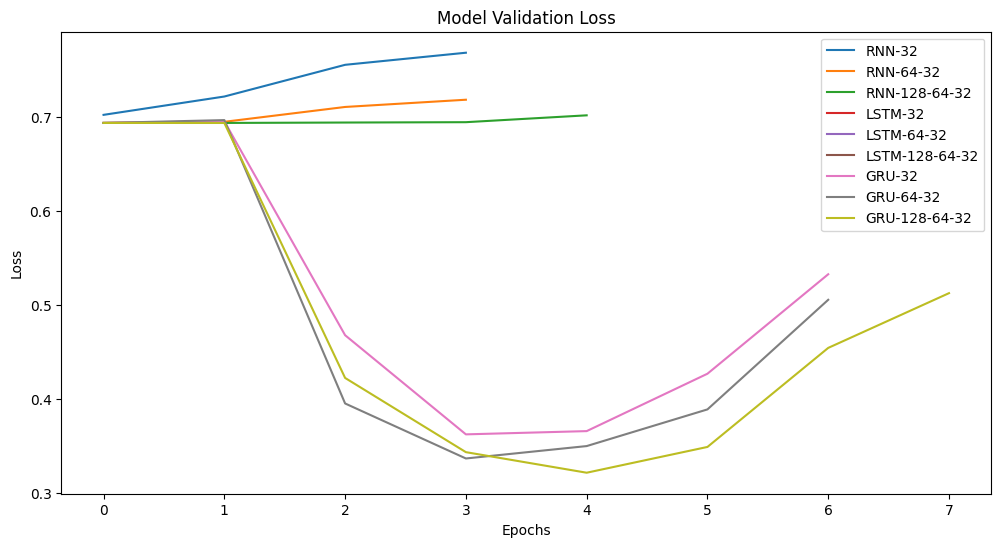

In [ ]:
# Plots
plt.figure(figsize = (12,6))
for name, h in history.items():
  plt.plot(h.history['val_loss'], label = name)

plt.title('Model Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

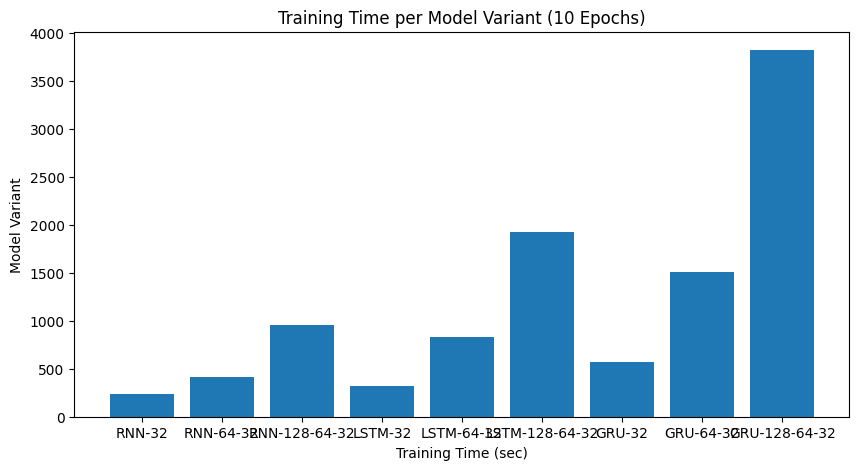

In [ ]:
# Runtime Barplot
plt.figure(figsize = (10, 5))
plt.bar(list(timings.keys()), list(timings.values()))
plt.title('Training Time per Model Variant (10 Epochs)')
plt.xlabel('Training Time (sec)')
plt.ylabel('Model Variant')
plt.show()

In [ ]:
# Summary Table
summary_df = pd.DataFrame({
    'Model' : list(results.keys()),
    'Accuracy' : list(results.values()),
    'Training Time (sec)' : list(timings.values())
})
print(summary_df)

            Model                                   Accuracy  \
0          RNN-32   (0.6998375058174133, 0.5049999952316284)   
1       RNN-64-32   (0.6929929256439209, 0.5030999779701233)   
2   RNN-128-64-32    (0.693154513835907, 0.5015000104904175)   
3         LSTM-32                  (nan, 0.4961000084877014)   
4      LSTM-64-32                  (nan, 0.4961000084877014)   
5  LSTM-128-64-32   (0.6931262016296387, 0.5038999915122986)   
6          GRU-32  (0.36019009351730347, 0.8396999835968018)   
7       GRU-64-32  (0.33576980233192444, 0.8562999963760376)   
8   GRU-128-64-32  (0.31781724095344543, 0.8608999848365784)   

   Training Time (sec)  
0           232.138204  
1           414.491395  
2           959.319664  
3           316.789426  
4           827.729560  
5          1923.133733  
6           569.169230  
7          1506.745556  
8          3819.437603  
